<a href="https://colab.research.google.com/github/gabyrr/CursoTIA/blob/main/TIA_algoritmos_aprendizaje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Algoritmos de aprendizaje
Notebook perteneciente al curso: Tópicos de inteligencia artificial: de métodos clásicos a modelos generativos. Por Gabriela Ramírez de la Rosa

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## volvemos a cargar el dataset de iris
from sklearn.datasets import load_iris
iris_dataset = load_iris()

X = iris_dataset.data
y = iris_dataset.target

In [3]:
indices = np.arange(y.shape[0])
indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

Ahora revolvemos los índices para seleccionar ejemplos de forma "aleatoria"

In [4]:
rnd = np.random.RandomState(142) ## la semilla fija en 142 para poder reproducir resultados
shuffled_indices = rnd.permutation(indices)
shuffled_indices

array([ 73,  18, 118,  78,  76,  31,  64, 141,  68,  82, 110,  12,  36,
         9,  19,  56, 104,  69,  55, 132,  29, 127,  26, 128, 131, 145,
       108, 143,  45,  30,  22,  15,  65,  11,  42, 146,  51,  27,   4,
        32, 142,  85,  86,  16,  10,  81, 133, 137,  75, 109,  96, 105,
        66,   0, 122,  67,  28,  40,  44,  60, 123,  24,  25,  23,  94,
        39,  95, 117,  47,  97, 113,  33, 138, 101,  62,  84, 148,  53,
         5,  93, 111,  49,  35,  80,  77,  34, 114,   7,  43,  70,  98,
       120,  83, 134, 135,  89,   8,  13, 119, 125,   3,  17,  38,  72,
       136,   6, 112, 100,   2,  63,  54, 126,  50, 115,  46, 139,  61,
       147,  79,  59,  91,  41,  58,  90,  48,  88, 107, 124,  21,  57,
       144, 129,  37, 140,   1,  52, 130, 103,  99, 116,  87,  74, 121,
       149,  20,  71, 106,  14,  92, 102])

Ahora utilizamos la variable indice para seleccionar los ejemplos adecuados en X y su correspondiente valor en y

In [7]:
X_shuffled, y_shuffled = X[shuffled_indices], y[shuffled_indices]
y_shuffled

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0,
       1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0,
       0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1,
       1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

Ahora dividimos el dataset en dos particiones: entrenamiento y evaluación

In [10]:
X_train, y_train = X_shuffled[:105], y_shuffled[:105] ## 105 instancias para entrenamiento
X_test, y_test = X_shuffled[105:], y_shuffled[105:] ## 45 para evaluación
len(X_train), len(X_test) ## cuántos valores hay por cada conjunto

(105, 45)

TODO lo anterior se puede realizar en un solo paso como sigue...

In [28]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## usando sólo dos atributos en lugar de 4
iris = load_iris()
X, y = iris.data[:, 2:], iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=142,
                                                    shuffle=True)


## kNN

### Generando el modelo

In [32]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

**PREGUNTA**: ¿Qué medida de distincia utiliza para calcular el vecino más cercano?

### Predicciones

In [63]:
y_pred = knn_model.predict(X_test)


num_correct_predictions = (y_pred == y_test).sum()
accuracy = (num_correct_predictions / y_test.shape[0]) * 100

print(f'Test set accuracy: {accuracy:.2f}%')

Test set accuracy: 91.11%


### Cómo se ve el modelo
Dado que usamos un dataset pequeño y con sólo dos atributos, se puede graficar en 2D

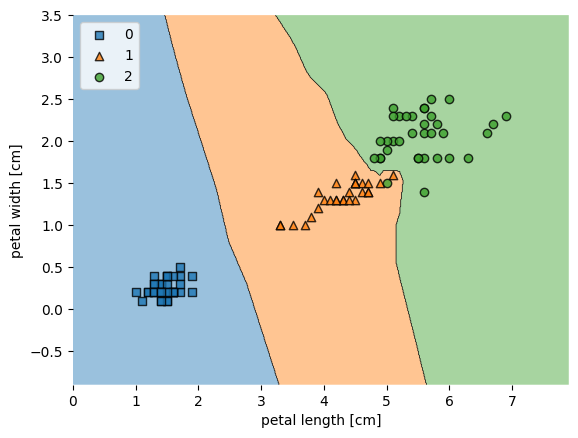

In [52]:
from mlxtend.plotting import plot_decision_regions

## cómo se ve el conjunto de entrenamiento en el modelo construído
plot_decision_regions(X_train, y_train, knn_model)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

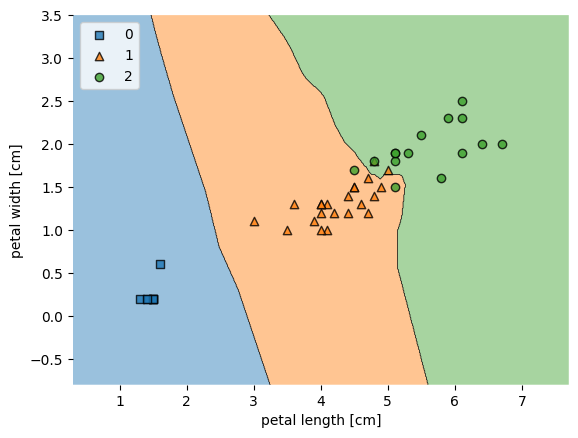

In [53]:
## y ahora el conjunto de evaluación
plot_decision_regions(X_test, y_test, knn_model)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()


## Árbol de decisión

In [69]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions


tree_model = DecisionTreeClassifier(criterion='entropy',
                              max_depth=3,
                              random_state=142)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=142)

In [70]:
y_pred = tree_model.predict(X_test)

num_correct_predictions = (y_pred == y_test).sum()
accuracy = (num_correct_predictions / y_test.shape[0]) * 100

print(f'Test set accuracy: {accuracy:.2f}%')

Test set accuracy: 95.56%


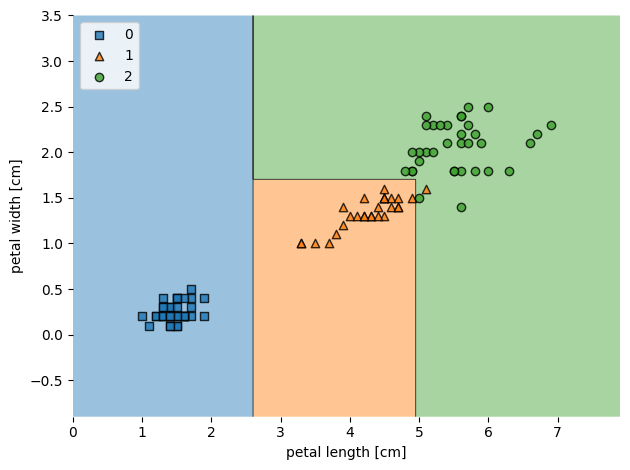

In [71]:
## En el conjunto de entrenamiento
plot_decision_regions(X_train, y_train, tree_model)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

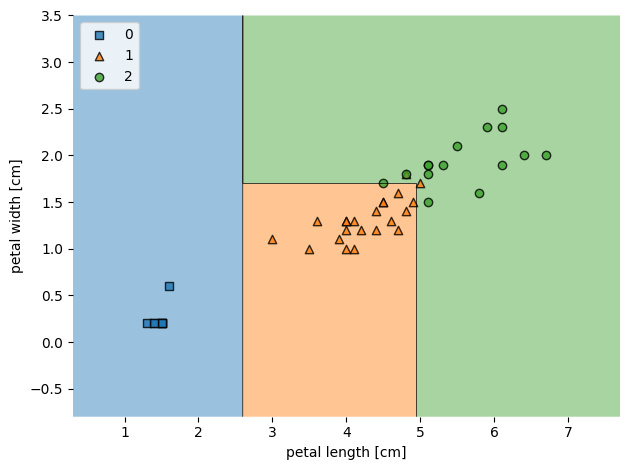

In [72]:
## En el conjunto de evaluación
plot_decision_regions(X_test, y_test, tree_model)

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [73]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz


dot_data = export_graphviz(tree_model,
                           filled=True,
                           rounded=True,
                           class_names=['Setosa',
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length',
                                          'petal width'],
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png') ## puede abrir el archivo y observarlo

True

**PREGUNTA:** ¿Qué algoritmo de aprendizaje es mejor, kNN o Árboles de decisión?

# Otros algoritmos de aprendizaje
Vea la documentación de *sklearn* para impementar los siguientes algoritmos con el dataset iris

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

In [ ]:
##Support Vector Machines
svc = SVC()
lsvm = LinearSVC()
## Naive BAyes
nb = MultinomialNB()

In [ ]:
## su código aquí

# **Parte II: Evaluación**

accuracy:  0.9111111111111111
precisión:  0.9252525252525253
recuerdo:  0.9252525252525253
f-score:  0.9252525252525253


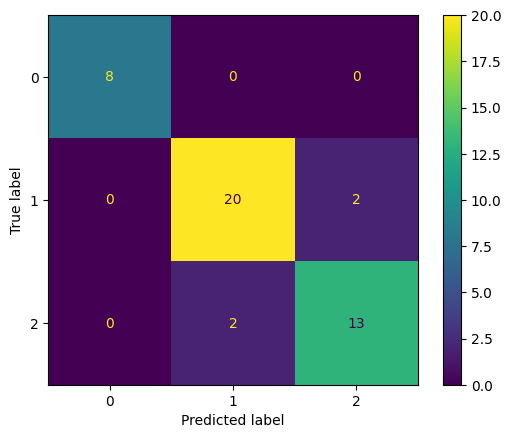

In [86]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## rápidamente volvemos a entrenamar el modelo knn
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)


print("accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("precisión: ", metrics.precision_score(y_test, y_pred,average='macro'))
print("recuerdo: ", metrics.recall_score(y_test, y_pred,average='macro'))
print("f-score: ", metrics.f1_score(y_test, y_pred,average='macro'))

confmat = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=confmat, display_labels=knn_model.classes_)
disp.plot()
plt.show()

## Esquema de evaluación: Cross fold validation

Hasta ahora hemos realizado particiones fijas para dividir el dataset

```
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=142,
                                                    shuffle=True)
```

Ahora veremos el esquema evaluación cruzada de k pliegues (cross fold validation)

In [96]:
from sklearn.model_selection import StratifiedKFold

iris_dataset = load_iris()

X = iris_dataset.data
y = iris_dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.15,
                                                    shuffle=True, stratify=y)

cv = StratifiedKFold(n_splits=10, random_state=123, shuffle=True)


clf = DecisionTreeClassifier(random_state=123, max_depth=3)
kfold_acc = 0.
for train_idx, validacion_idx in cv.split(X_train, y_train):
    clf.fit(X_train[train_idx], y_train[train_idx])
    y_pred = clf.predict(X_train[validacion_idx])
    acc = np.mean(y_pred == y_train[validacion_idx])*100
    kfold_acc += acc
kfold_acc /= 10

clf = DecisionTreeClassifier(random_state=123, max_depth=3).fit(X_train, y_train)
y_pred = clf.predict(X_test)
test_acc = np.mean(y_pred == y_test)*100

print('Kfold Accuracy: %.2f%%' % kfold_acc)
print('Test Accuracy: %.2f%%' % test_acc)

Kfold Accuracy: 95.26%
Test Accuracy: 95.65%


PREGUNTA: ¿Por qué existe esa discrepancia en los valores anteriores?

## Práctica
Utilizando los datasets que exploró antes, diseñe un conjunto de experimentos utilizando diferentes algoritmos de aprendizaje y una o más formas de evaluación (en cuanto a la organización de los datos)

In [ ]:
#puede trabajar aquí o generar un notebook nuevo#

